<a href="https://colab.research.google.com/github/azamatnarzuloyev/Data_science/blob/main/Bak_kreditML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import some popular libraries we will use in this project 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the DataFile
data = pd.read_csv("../input/bank-loan/Bank_Personal_Loan_Modelling.csv", sep = "," , encoding="utf-8")

In [ ]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,3626000,91107,4,118400,1,0,0,1,0,0,0
1,2,45,19,2516000,90089,3,111000,1,0,0,1,0,0,0
2,3,39,15,814000,94720,1,74000,1,0,0,0,0,0,0
3,4,35,9,7400000,94112,1,199800,2,0,0,0,0,0,0
4,5,35,8,3330000,91330,4,74000,2,0,0,0,0,0,1


Data Description:								
									
    ID:	           Customer ID							
    Age:	       Customer's age in completed years							
    Experience:	   #years of professional experience							
    Income	       Annual income of the customer ($000)
    ZIPCode:	   Home Address ZIP code.							
    Family:	       Family size of the customer							
    CCAvg:	       Avg. spending on credit cards per month ($000)							
    Education:	   Education Level. 1: Undergrad; 2: Graduate; 3: Advanced Professional							
    Mortgage:	   Value of house mortgage if any. ($000)							
    Personal Loan: Did this customer accept the personal loan offered in the last campaign?							
    Securities     Account: Does the customer have a securities account with the bank?							
    CD Account:	   Does the customer have a certificate of deposit (CD) account with the bank?							
    Online:        Does the customer use internet banking facilities?							
    CreditCard:	   Does the customer use a credit card issued by UniversalBank?							

In [ ]:
#checking the null values in the dataset
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [ ]:
#drop duplicates in the data
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(5000, 14)

In [ ]:
#Return all distinct value in each column
data.nunique()


ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
#return some information about each column as DataType and Number of Entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 5000 non-null   int64
 1   Age                5000 non-null   int64
 2   Experience         5000 non-null   int64
 3   Income             5000 non-null   int64
 4   ZIPCode            5000 non-null   int64
 5   Family             5000 non-null   int64
 6   CCAvg              5000 non-null   int64
 7   Education          5000 non-null   int64
 8   Mortgage           5000 non-null   int64
 9   PersonalLoan       5000 non-null   int64
 10  SecuritiesAccount  5000 non-null   int64
 11  CDAccount          5000 non-null   int64
 12  Online             5000 non-null   int64
 13  CreditCard         5000 non-null   int64
dtypes: int64(14)
memory usage: 585.9 KB


In [ ]:
data['CCAvg']=data.CCAvg.astype(int)

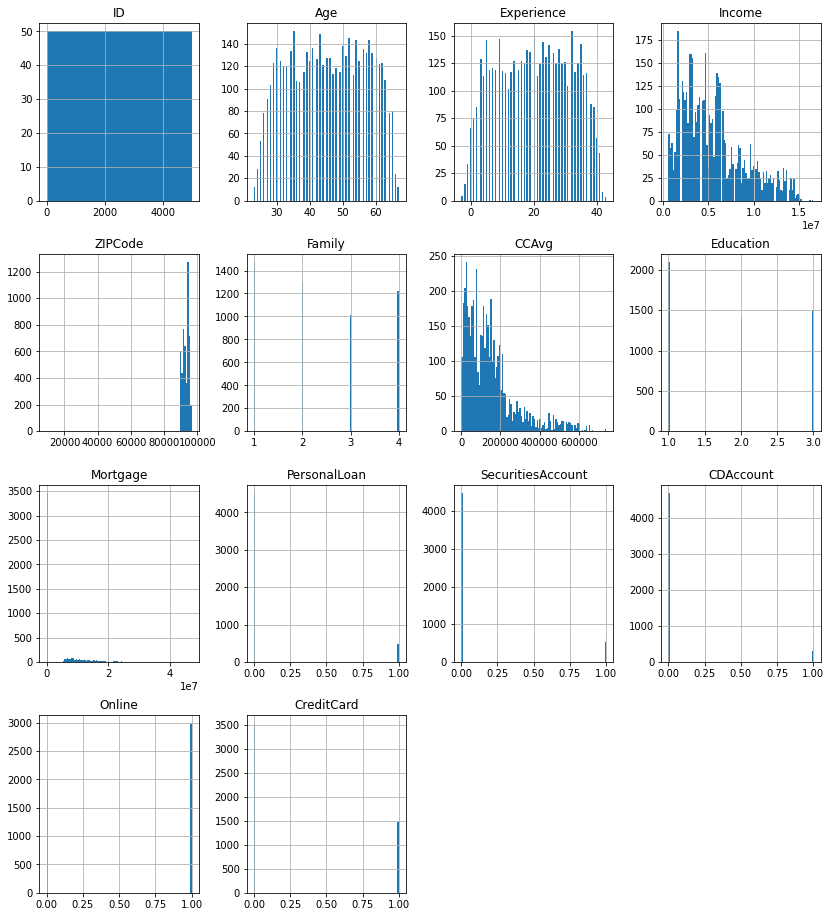

In [ ]:
#Histogram of all data's feature Distribution
data.hist(bins=100 , figsize=(14,16))
plt.show()

<AxesSubplot:>

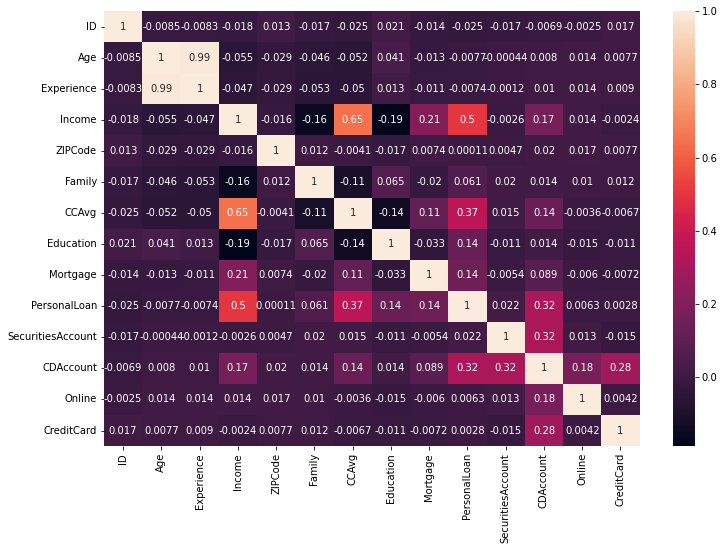

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap( data.corr(), annot = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

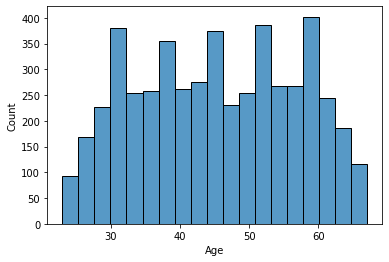

In [ ]:
#Age Distribution
sns.histplot(data = data,x = 'Age')


<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

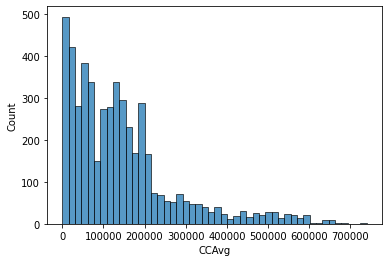

In [ ]:
#CCAvg  Distribution
sns.histplot(data = data,x = 'CCAvg')


<AxesSubplot:xlabel='Income', ylabel='Count'>

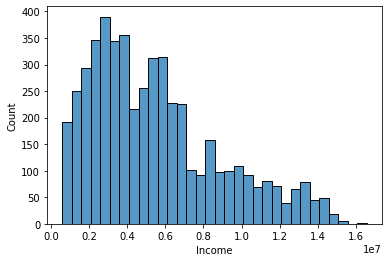

In [ ]:
#Income Distribution
sns.histplot(data = data,x = 'Income')


<AxesSubplot:xlabel='Experience', ylabel='Count'>

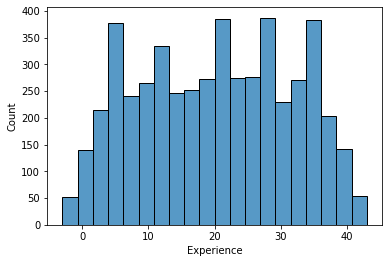

In [ ]:
#Experience Distribution
sns.histplot(data = data,x = 'Experience')


<AxesSubplot:ylabel='PersonalLoan'>

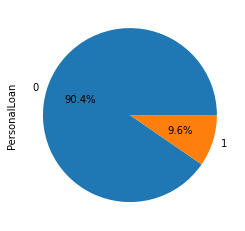

In [ ]:
#Personal Loan value Ratios
round(data['PersonalLoan'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

<AxesSubplot:>

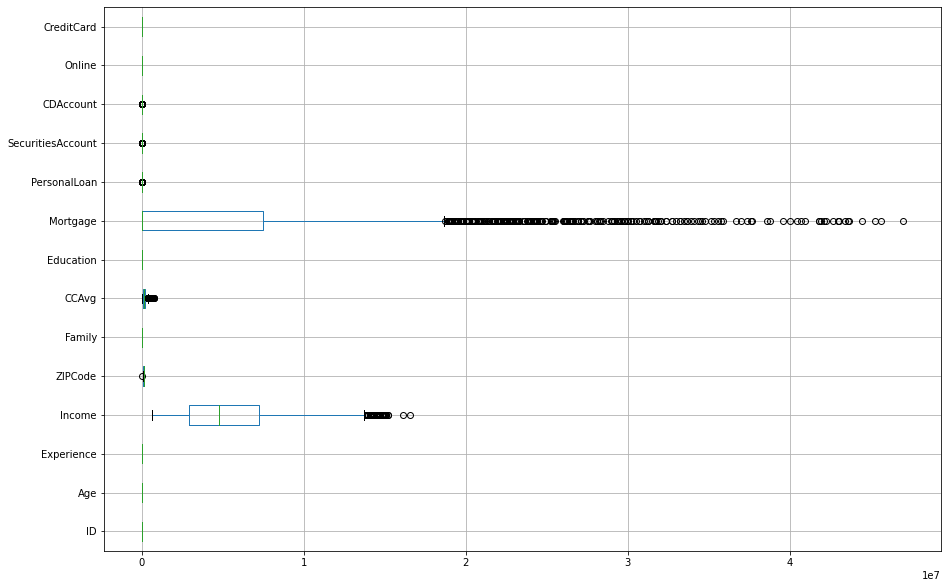

In [ ]:
plt.figure(figsize=(15,10))
data.boxplot(vert=0)

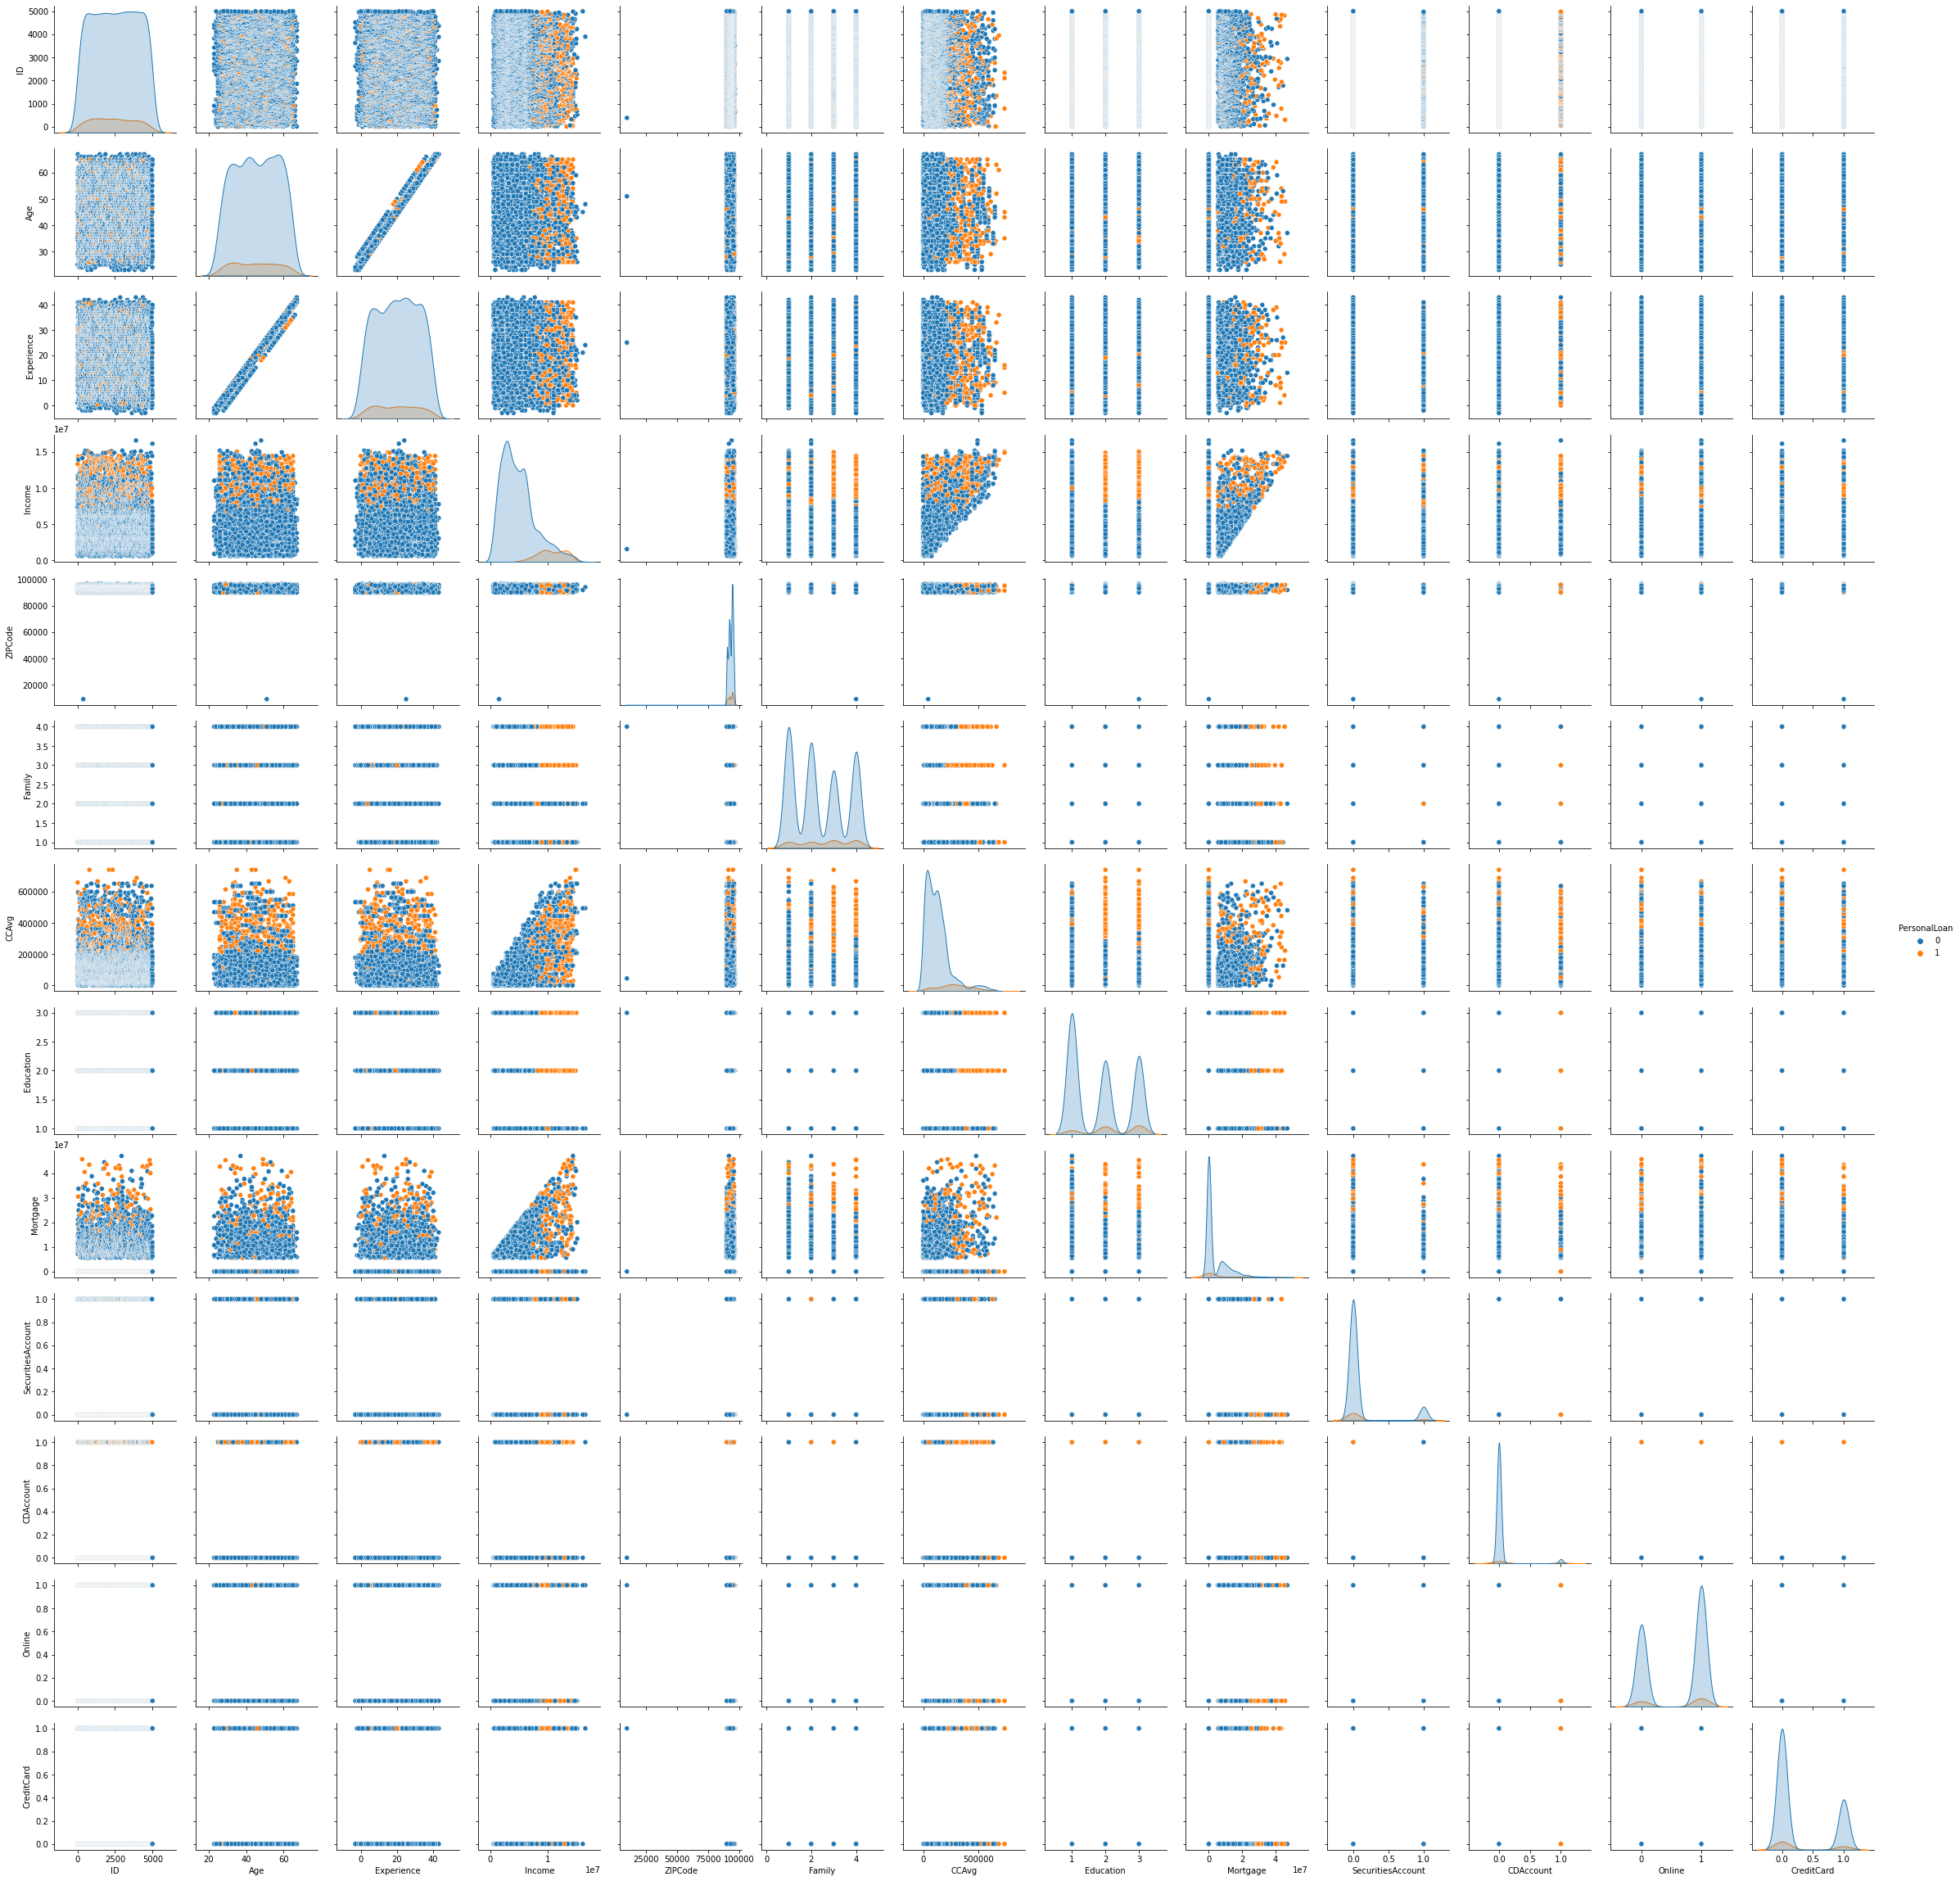

In [ ]:
sns.pairplot(data, hue="PersonalLoan")


In [ ]:
X = data.drop("PersonalLoan" , axis = 1).values
y = data['PersonalLoan'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

**KNN** **MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kclf = KNeighborsClassifier(n_neighbors=6 )

In [ ]:
kclf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
kclf_score_train = kclf.score(X_train,y_train)


In [ ]:
kclf_score_test = kclf.score(X_test,y_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
y_predict = kclf.fit(X_train, y_train).predict(X_test)


In [ ]:
print(classification_report(y_test, y_predict, target_names =['0','1']))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1116
           1       0.96      0.48      0.64       134

    accuracy                           0.94      1250
   macro avg       0.95      0.74      0.80      1250
weighted avg       0.94      0.94      0.93      1250



<AxesSubplot:>

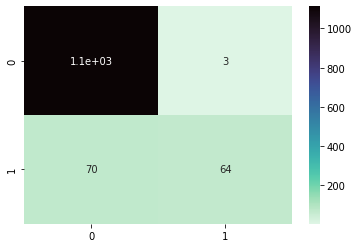

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

**Logistic** **Regression** **Model**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()


In [ ]:
lr.fit(X_train,y_train)


LogisticRegression()

In [ ]:
lr_score_train = lr.score(X_train,y_train)


In [ ]:
lr_score_test = lr.score(X_test,y_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
y_predict = lr.fit(X_train, y_train).predict(X_test)


In [ ]:
print(classification_report(y_test, y_predict, target_names =['0','1']))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1116
           1       0.87      0.62      0.72       134

    accuracy                           0.95      1250
   macro avg       0.91      0.80      0.85      1250
weighted avg       0.95      0.95      0.95      1250



<AxesSubplot:>

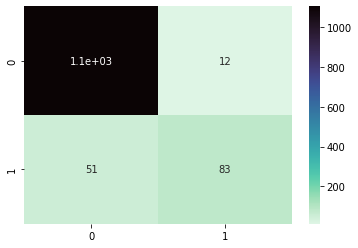

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()


In [ ]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
rf_score_train = rf.score(X_train,y_train)


In [ ]:
rf_score_test = rf.score(X_test,y_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
y_predict = rf.fit(X_train, y_train).predict(X_test)


In [ ]:
print(classification_report(y_test, y_predict, target_names =['0','1']))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1116
           1       0.99      0.91      0.95       134

    accuracy                           0.99      1250
   macro avg       0.99      0.95      0.97      1250
weighted avg       0.99      0.99      0.99      1250



<AxesSubplot:>

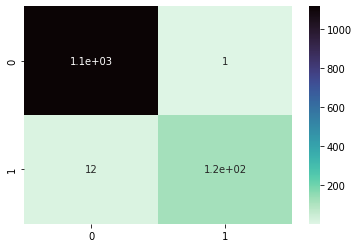

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

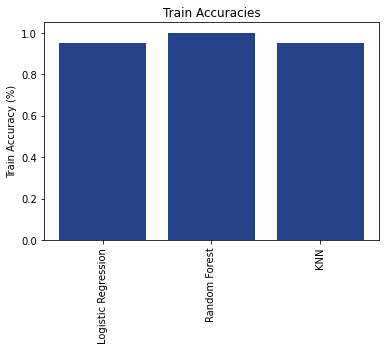

In [ ]:
predictors_group = ('Logistic Regression','Random Forest','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_train, rf_score_train, kclf_score_train]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Train Accuracy (%)')
plt.title('Train Accuracies')
plt.show()

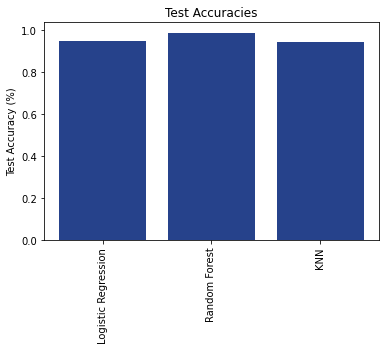

In [ ]:
predictors_group = ('Logistic Regression','Random Forest','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_test, rf_score_test, kclf_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Test Accuracy (%)',)
plt.title('Test Accuracies')
plt.show()

>1, train: 1.000, test: 0.923
>2, train: 0.961, test: 0.913
>3, train: 0.960, test: 0.933
>4, train: 0.956, test: 0.936
>5, train: 0.954, test: 0.936
>6, train: 0.953, test: 0.934
>7, train: 0.950, test: 0.934
>8, train: 0.950, test: 0.934
>9, train: 0.947, test: 0.935
>10, train: 0.945, test: 0.936
>11, train: 0.948, test: 0.933
>12, train: 0.948, test: 0.936
>13, train: 0.945, test: 0.934
>14, train: 0.947, test: 0.935
>15, train: 0.945, test: 0.934
>16, train: 0.945, test: 0.937
>17, train: 0.944, test: 0.936
>18, train: 0.945, test: 0.935
>19, train: 0.945, test: 0.935
>20, train: 0.944, test: 0.936
>21, train: 0.943, test: 0.934
>22, train: 0.943, test: 0.934
>23, train: 0.941, test: 0.932
>24, train: 0.941, test: 0.931
>25, train: 0.941, test: 0.931
>26, train: 0.941, test: 0.931
>27, train: 0.940, test: 0.932
>28, train: 0.942, test: 0.932
>29, train: 0.940, test: 0.932
>30, train: 0.939, test: 0.931
>31, train: 0.938, test: 0.931
>32, train: 0.939, test: 0.930
>33, train: 0.939

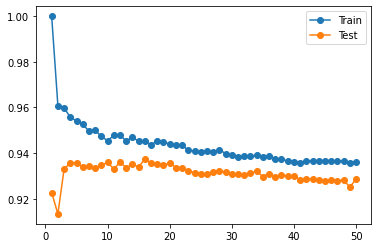

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.23357214690901212)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred_lr)
print("Logistic Regression Accuracy:",acc_lr*100,"%")

Logistic Regression Accuracy: 85.36666666666667 %


In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_pred_lr)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_pred_lr)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_pred_lr)))
prec_logit = precision_score(y_test,y_pred_lr, average='micro')
rec_logit = recall_score(y_test,y_pred_lr, average='micro')
f1_logit = f1_score(y_test,y_pred_lr, average='micro')
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1515
           1       0.80      0.93      0.86      1485

    accuracy                           0.85      3000
   macro avg       0.86      0.85      0.85      3000
weighted avg       0.86      0.85      0.85      3000

Confusion matrix for LR: 
[[1173  342]
 [  97 1388]]
Accuracy score for LR: 0.85
Precision score for LR: 0.85
Recall score for LR: 0.85
F1 score for LR: 0.85


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PersonalLoan', ylabel='count'>

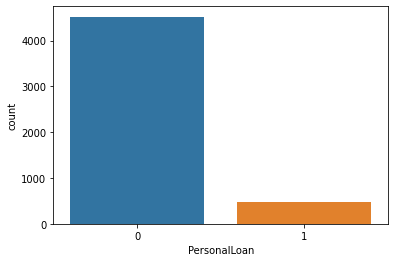

In [ ]:
import seaborn as sns
sns.countplot(data['PersonalLoan'])

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['PersonalLoan']==0)] 
df_minority = data[(data['PersonalLoan']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5000, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PersonalLoan', ylabel='count'>

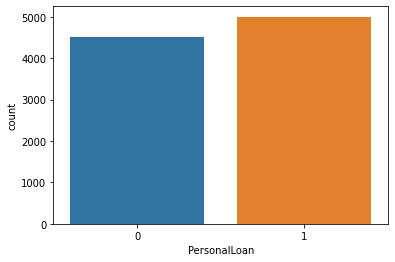

In [ ]:
sns.countplot(df_upsampled['PersonalLoan'])

In [ ]:
df_upsampled.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df_upsampled

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
1039,1040,41,16,12950000,94304,2,81400,3,0,1,0,0,1,0
4357,4358,39,14,10434000,93302,4,466200,1,0,1,1,1,1,1
3464,3465,61,37,12728000,92612,4,314500,1,0,1,0,1,1,1
2614,2615,35,11,11840000,92093,4,421800,3,0,1,1,0,0,0
1066,1067,30,5,9250000,90016,4,37000,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,2960000,92697,1,140600,3,0,0,0,0,1,0
4996,4997,30,4,1110000,92037,4,29600,1,6290000,0,0,0,1,0
4997,4998,63,39,1776000,93023,2,22200,3,0,0,0,0,0,0
4998,4999,65,40,3626000,90034,3,37000,2,0,0,0,0,1,0


In [ ]:
df_upsampled= df_upsampled[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount','CDAccount', 'Online', 'CreditCard']]

In [ ]:
df_upsampled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
1039,41,16,12950000,2,81400,3,0,1,0,0,1,0
4357,39,14,10434000,4,466200,1,0,1,1,1,1,1
3464,61,37,12728000,4,314500,1,0,1,0,1,1,1
2614,35,11,11840000,4,421800,3,0,1,1,0,0,0
1066,30,5,9250000,4,37000,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,2960000,1,140600,3,0,0,0,0,1,0
4996,30,4,1110000,4,29600,1,6290000,0,0,0,1,0
4997,63,39,1776000,2,22200,3,0,0,0,0,0,0
4998,65,40,3626000,3,37000,2,0,0,0,0,1,0


In [ ]:
X = df_upsampled.drop("PersonalLoan" , axis = 1).values
y = df_upsampled['PersonalLoan'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kclf = KNeighborsClassifier(n_neighbors=6 )

In [ ]:
kclf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
kclf_score_train = kclf.score(X_train,y_train)


In [ ]:
kclf_score_test = kclf.score(X_test,y_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict = kclf.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict, target_names =['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1131
           1       0.96      0.99      0.98      1249

    accuracy                           0.98      2380
   macro avg       0.98      0.97      0.98      2380
weighted avg       0.98      0.98      0.98      2380



<AxesSubplot:>

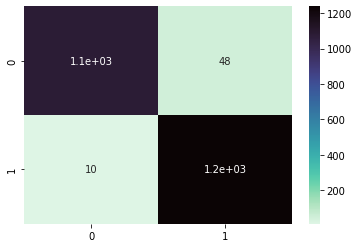

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dct_score_train = dct.score(X_train, y_train)

In [ ]:
dct_score_test = dct.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict = dct.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict, target_names =['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1131
           1       0.99      0.98      0.99      1249

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



<AxesSubplot:>

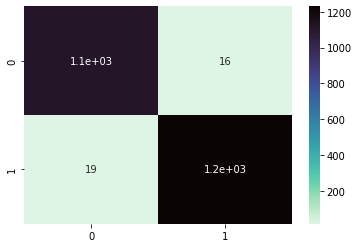

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

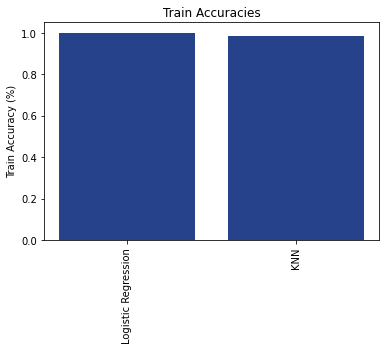

In [ ]:
predictors_group = ('Logistic Regression', 'KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [dct_score_train, kclf_score_train]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Train Accuracy (%)')
plt.title('Train Accuracies')
plt.show()

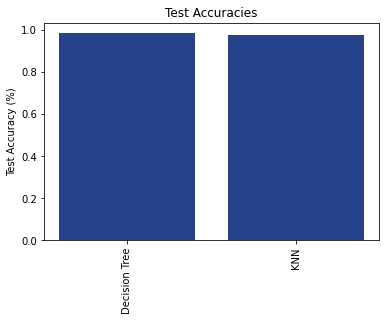

In [ ]:
predictors_group = ('Decision Tree','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [dct_score_test, kclf_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Test Accuracy (%)',)
plt.title('Test Accuracies')
plt.show()